In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show

In [3]:
crime_data = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_crime/Crimes_-_2001_to_present.csv')

In [4]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6309193,HP390075,06/11/2008 11:00:00 PM,045XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,18.0,70.0,26,1147487.0,1846446.0,2008,02/04/2016 06:33:39 AM,41.734598,-87.735264,"(41.734598385, -87.73526384)"
1,6309194,HP399120,06/16/2008 07:05:27 PM,010XX N MASSASOIT AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,29.0,25.0,06,1137833.0,1906342.0,2008,02/04/2016 06:33:39 AM,41.899141,-87.769192,"(41.899141429, -87.769191932)"
2,6309195,HP383610,06/08/2008 10:50:00 PM,050XX S CAMPBELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,14.0,63.0,08B,1160554.0,1871189.0,2008,02/04/2016 06:33:39 AM,41.802238,-87.686710,"(41.802237609, -87.686710161)"
3,6309196,HP392398,06/13/2008 09:10:00 AM,076XX S CARPENTER ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,17.0,71.0,14,1170638.0,1854168.0,2008,02/04/2016 06:33:39 AM,41.755316,-87.650224,"(41.755315836, -87.650223819)"
4,6309197,HP398014,06/16/2008 08:50:00 AM,022XX W WARREN BLVD,0810,THEFT,OVER $500,STREET,False,False,...,2.0,28.0,06,1161454.0,1900313.0,2008,02/04/2016 06:33:39 AM,41.882138,-87.682600,"(41.88213835, -87.682600206)"


In [5]:
new_df= crime_data[crime_data['Primary Type'] == 'HOMICIDE']['Location Description'].value_counts().reset_index()

In [6]:
new_df.columns = ['Location Description', 'Crime Count']

In [7]:
new_df.head(10)

,Location Description,Crime Count
0,STREET,3895
1,AUTO,985
2,APARTMENT,698
3,ALLEY,517
4,HOUSE,463
5,PORCH,247
6,YARD,164
7,PARKING LOT,139
8,PARK PROPERTY,95
9,VACANT LOT,93


In [11]:
new_df[new_df['Crime Count'] > 15]

,Location Description,Crime Count
0,STREET,3895
1,AUTO,985
2,APARTMENT,698
3,ALLEY,517
4,HOUSE,463
5,PORCH,247
6,YARD,164
7,PARKING LOT,139
8,PARK PROPERTY,95
9,VACANT LOT,93


In [9]:
100*crime_data[crime_data['Primary Type'] == 'HOMICIDE']['Location Description'].value_counts()/len(crime_data[crime_data['Primary Type'] == 'HOMICIDE'])

STREET                       47.721147
AUTO                         12.068121
APARTMENT                     8.551826
ALLEY                         6.334232
HOUSE                         5.672629
PORCH                         3.026219
YARD                          2.009311
PARKING LOT                   1.703014
PARK PROPERTY                 1.163930
VACANT LOT                    1.139427
HALLWAY                       0.967900
RETAIL STORE                  0.820877
GANGWAY                       0.759618
GARAGE                        0.563587
GAS STATION DRIVE/PROP.       0.514580
CHA GROUNDS                   0.465572
RESTAURANT                    0.453320
CHA PARKING LOT               0.428816
CHA HALLWAY                   0.416565
TAVERN                        0.392061
GAS STATION                   0.379809
BASEMENT                      0.355305
ABANDONED BUILDING            0.306297
CHA APARTMENT                 0.294046
VESTIBULE                     0.196030
HOTEL                    

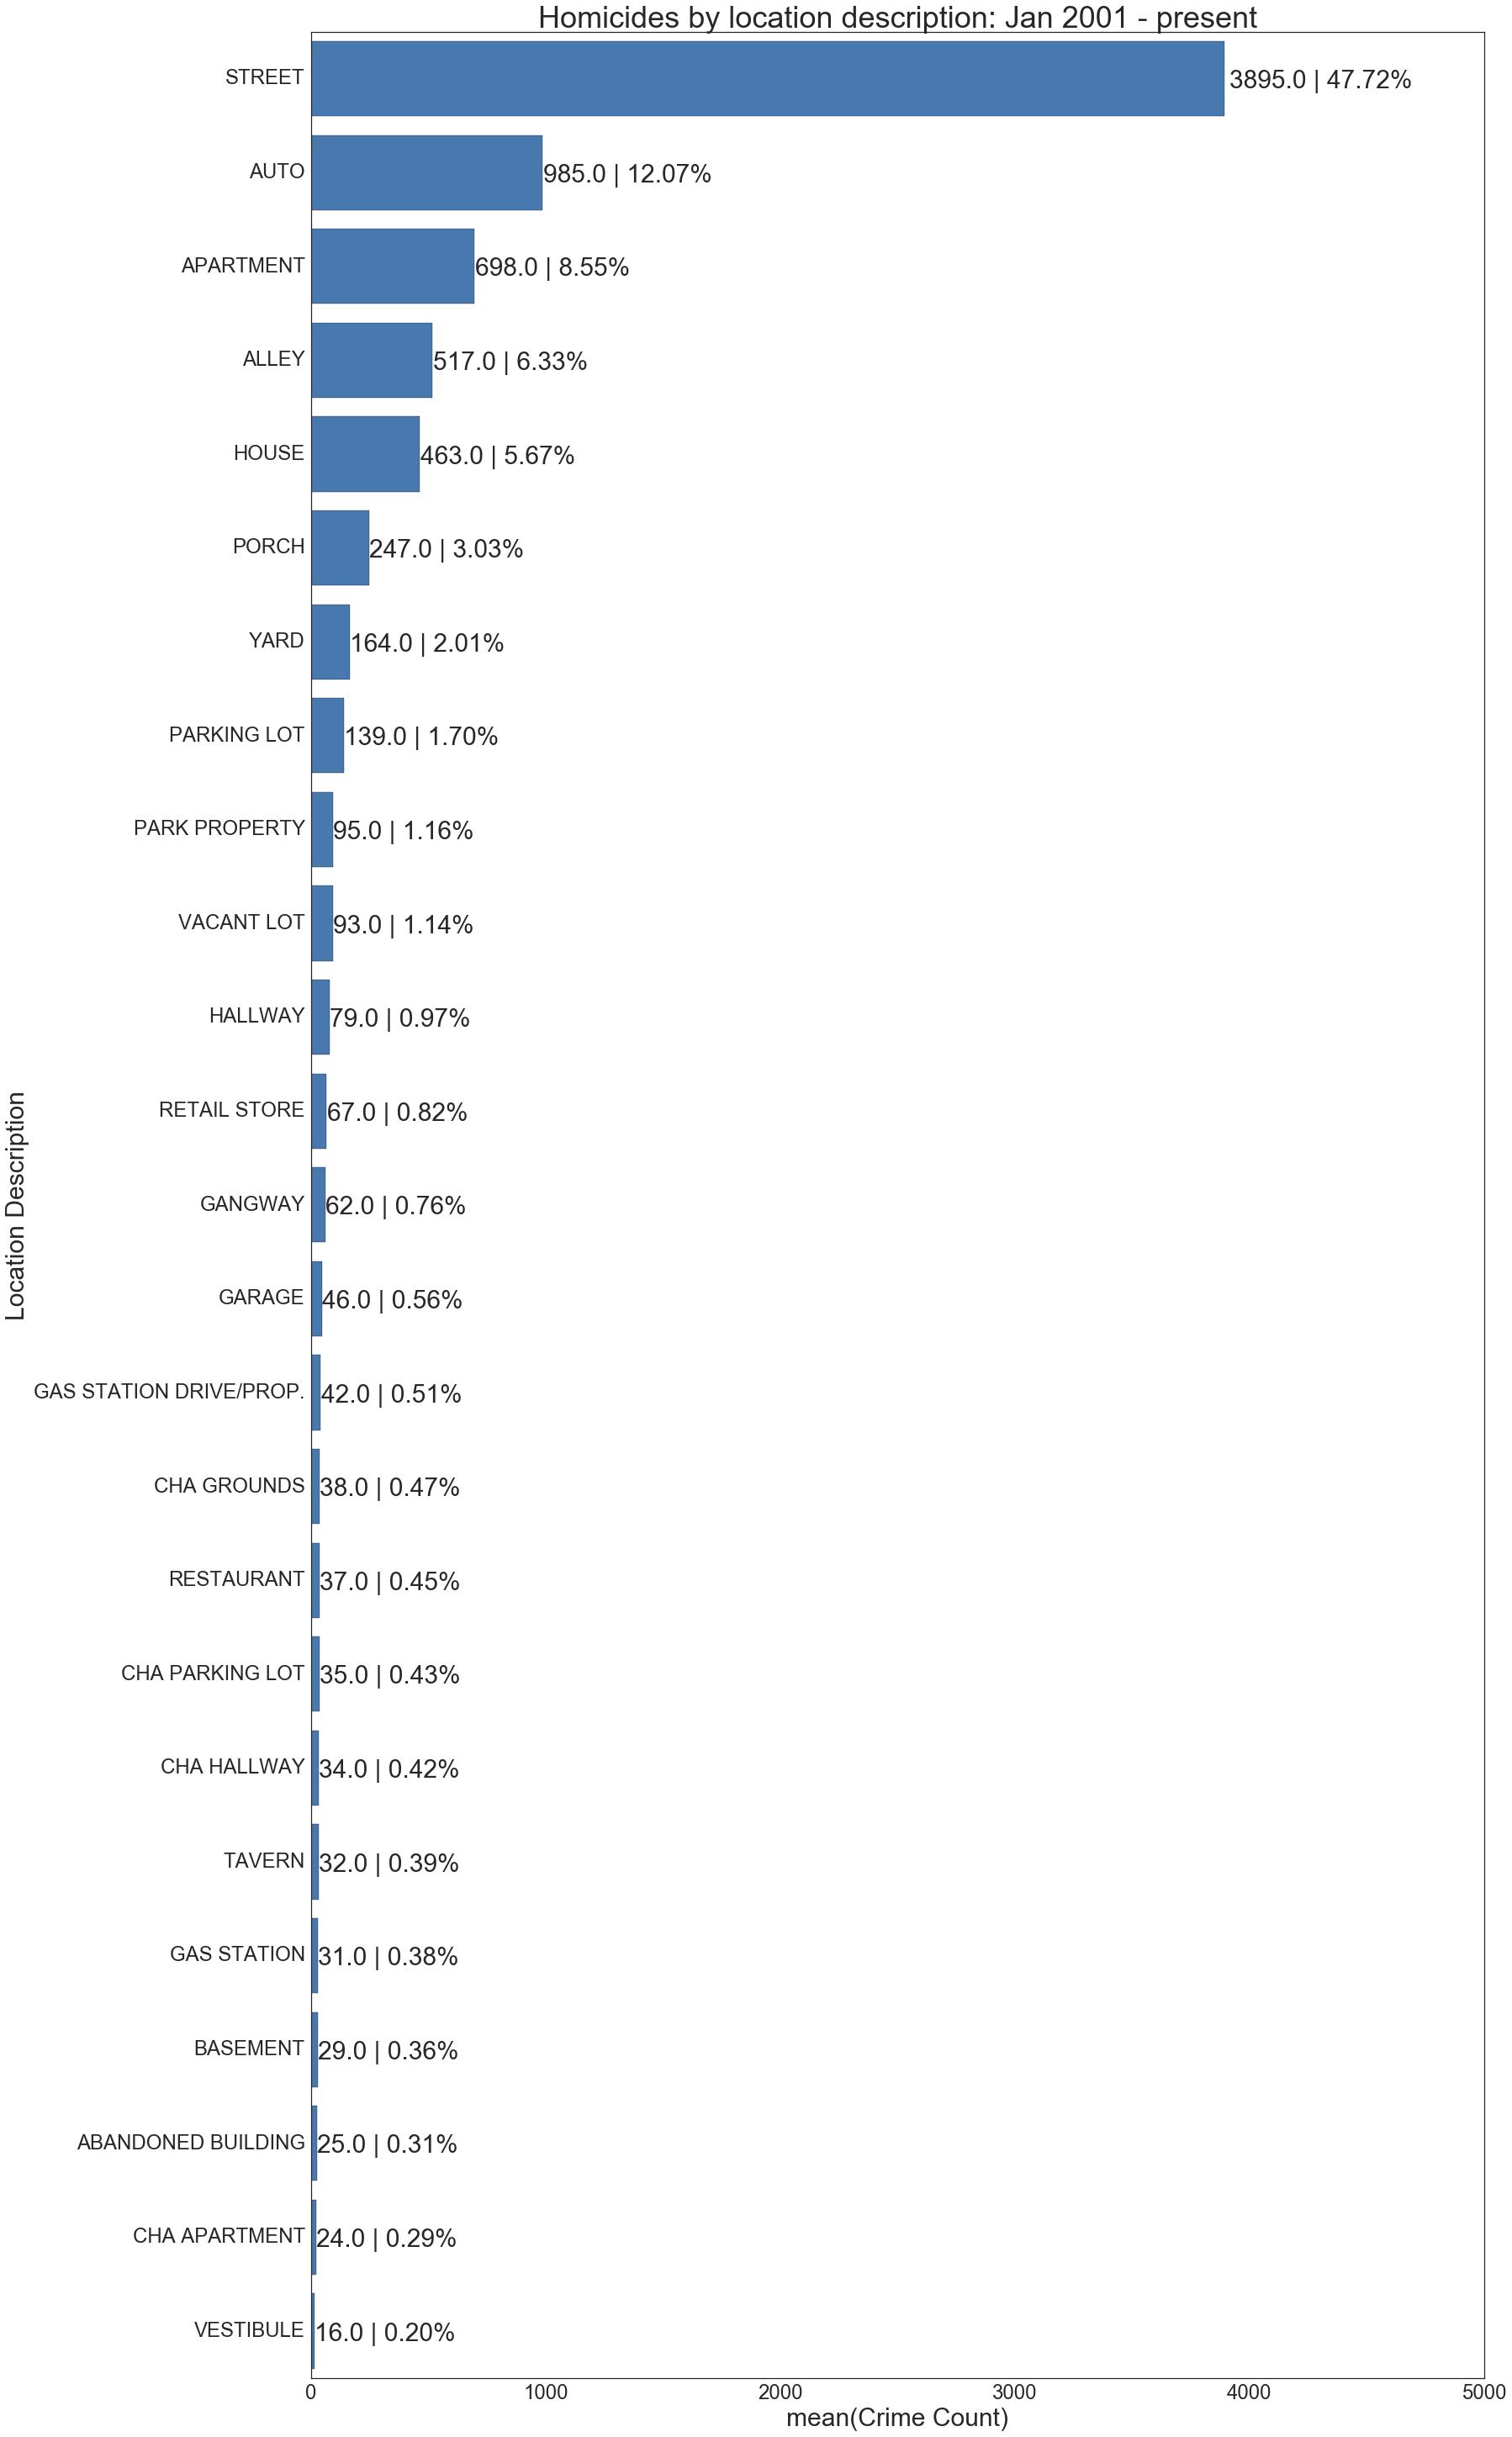

In [15]:
#Change your figure size to be (25,100)
plt.subplots(figsize=(25,50))
#Make backround while
sns.set_style('white')
#every bar should have same color - windows blue
ax = sns.barplot(x='Crime Count',y='Location Description',data= new_df[new_df['Crime Count'] > 15],n_boot = 200, color='#3778bf')
#change font size of ticks and labels to make them look big(Don't use deafult font size)
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
ax.set_xbound(0,5000)
ax.tick_params(axis='x',which='major',labelsize=24)
ax.tick_params(axis='y',which='major',labelsize=24)
#change the tilte
ax.set_title('Homicides by location description: Jan 2001 - present')
ax.title.set_fontsize(36)
for p in ax.patches:
    output = str(p.get_width()) + ' | ' +  '%1.2f'%((100 * p.get_width())/len(crime_data[crime_data['Primary Type'] == 'HOMICIDE'])) + '%'
    ax.annotate(output,(p.get_width() * 1.005, p.get_y() + 0.5),fontsize=30)
show()